In [2]:
import pandas as pd 

names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]
dataset = pd.read_csv('mush.csv',names = names)

In [3]:
from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy[0:15])


In [4]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(encodedx, encodedy, test_size=0.2,random_state=1)

In [5]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [6]:
mlp_clf = MLPClassifier(
                        max_iter = 2000,activation = 'relu',
                        solver = 'adam', hidden_layer_sizes = 1,alpha =1)


mlp_clf.fit(trainX_scaled, trainY.ravel())

MLPClassifier(alpha=1, hidden_layer_sizes=1, max_iter=2000)

In [7]:
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.96


--- 1.0019118785858154 seconds ---


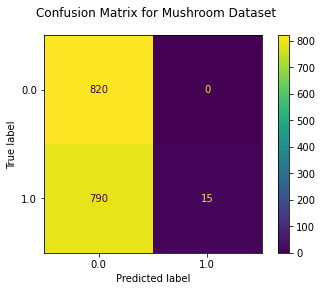

 
Confusion Matrix:


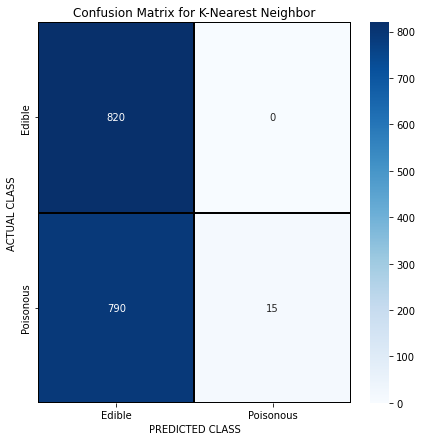

In [10]:
from sklearn.metrics import plot_confusion_matrix
import time
import seaborn as sns
start_time = time.time()
from sklearn.metrics import confusion_matrix
mlp_clf = MLPClassifier(
    
    hidden_layer_sizes=(150, 100, 50),
    solver='adam',
    alpha=0.0001, 
    batch_size='auto',
    learning_rate='invscaling',
    max_iter=100,
    learning_rate_init = .18
)

mlp_clf.fit(trainX_scaled, trainY.ravel())
y_pred = mlp_clf.predict(testX_scaled)
print("--- %s seconds ---" % (time.time() - start_time))
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Mushroom Dataset")
plt.show()


cm = confusion_matrix(testY, y_pred)
print(" ")
#print("Confusion Matrix (criterion='gini', max_depth=15, min_samples_split=8, splitter='random'):")
print("Confusion Matrix:")
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for K-Nearest Neighbor')
plt.savefig("dtcm2.png", format='png', dpi=500, bbox_inches='tight')
plt.show()


In [78]:

print(classification_report(testY, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       820
         1.0       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



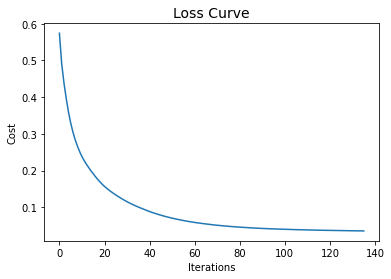

In [10]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
# Hyper Parameter Tuning
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [100],
    'activation': ['tanh'],
    'solver': [ 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=10)
grid.fit(trainX_scaled, trainY.ravel())

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

print("--- %s seconds ---" % (time.time() - start_time))
print(grid.best_params_) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
cv_scores mean:1.0
--- 12.149579763412476 seconds ---
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [11]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 1.00


In [1]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix( testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Mushroom Dataset")
plt.show()

NameError: name 'testX_scaled' is not defined

--- 19.925235986709595 seconds ---
[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.74507389 1.        ]
cv_scores mean:0.9430190742794128
 
Confusion Matrix:


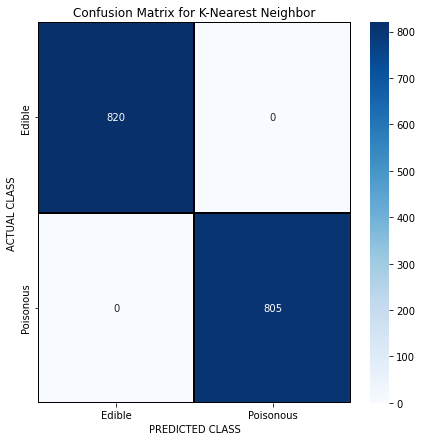

--- 20.484572172164917 seconds ---
Accuracy: 1.00


In [11]:

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

import time
start_time = time.time()

mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', max_iter=100)

mlp_clf.fit(trainX_scaled, trainY.ravel())


cv_scores = cross_val_score(mlp_clf,  encodedx, encodedy.ravel(), cv=10)
#print each cv score (accuracy) and average them
print("--- %s seconds ---" % (time.time() - start_time))
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(testX_scaled)



cm = confusion_matrix(testY, y_pred)
print(" ")
#print("Confusion Matrix (criterion='gini', max_depth=15, min_samples_split=8, splitter='random'):")
print("Confusion Matrix:")
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for K-Nearest Neighbor')
plt.savefig("dtcm2.png", format='png', dpi=500, bbox_inches='tight')
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

In [43]:
0.9448663649198068
0.9446200595010875
0.938216118614388

0.938216118614388

In [ ]:
0.9975384382337348
0.998155722184352
